Task 3 IRIS FLOWER CLASSIFICATION

In [ ]:
# Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# importing the dataset
df = pd.DataFrame(pd.read_csv("/content/IRIS.csv"))
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


EDA


In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
df['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


Pairplot

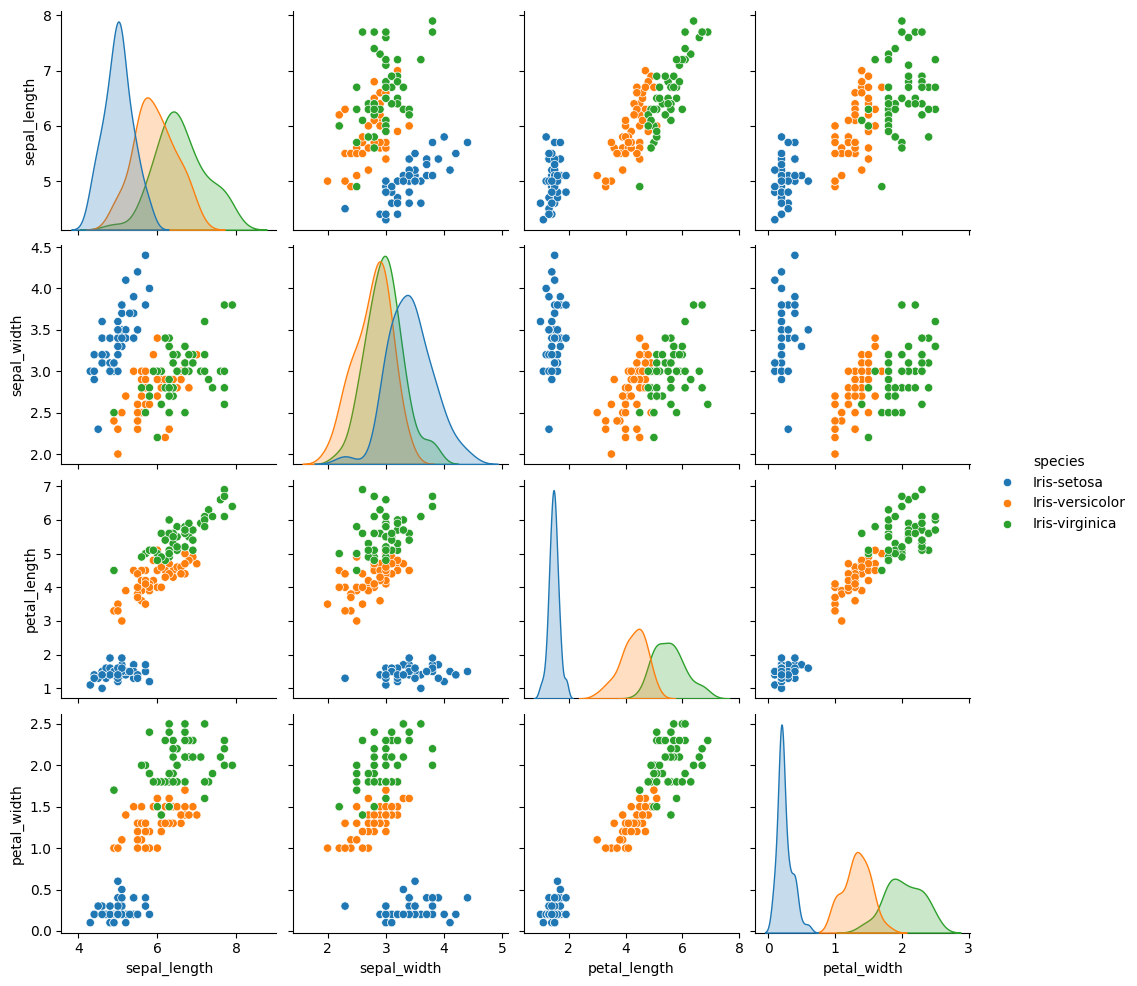

In [ ]:
sns.pairplot(df, hue='species')
plt.show()

Checkig outliers

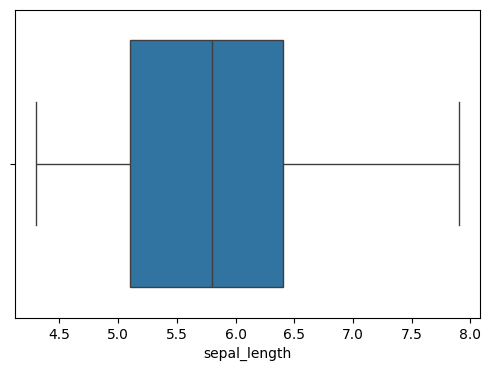

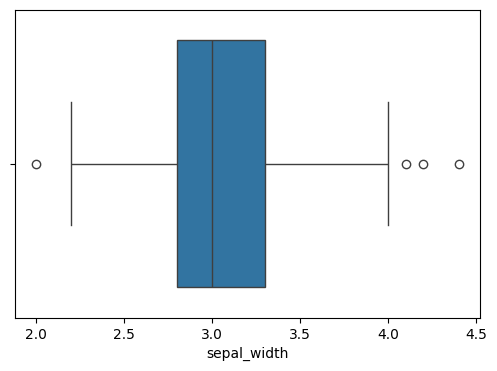

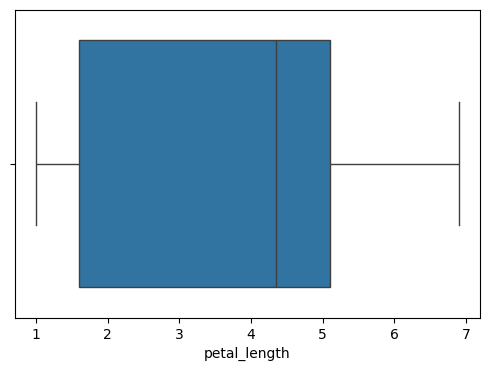

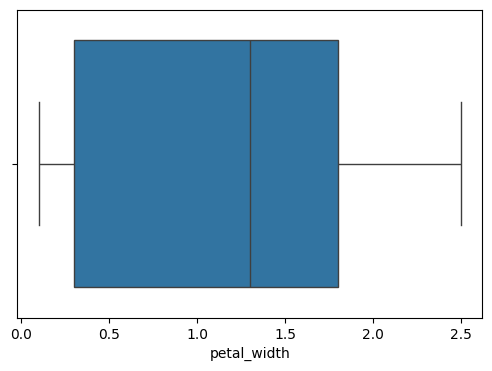

In [ ]:
numeric_columns = ['sepal_length','sepal_width','petal_length','petal_width']
for col in numeric_columns:
    plt.figure(figsize= (6,4))
    sns.boxplot(x = df[col])

Barchart for analysing distribution

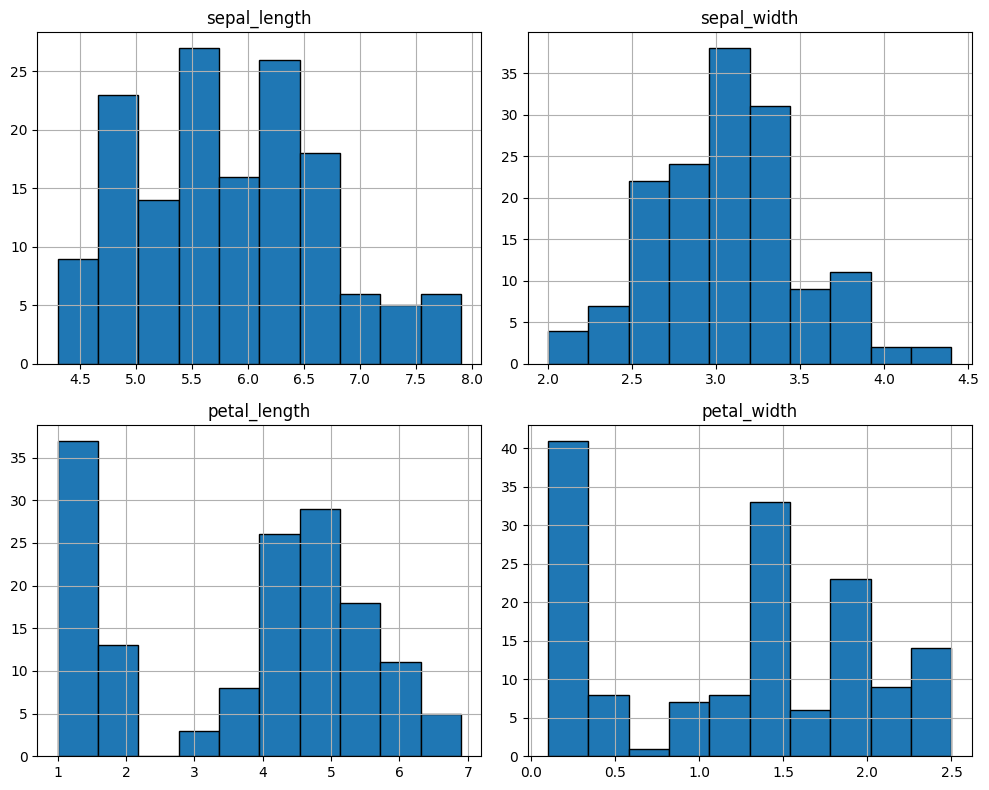

In [ ]:
df.hist(edgecolor='black', figsize=(10, 8))
plt.tight_layout()
plt.show()

Heatmap for corelation

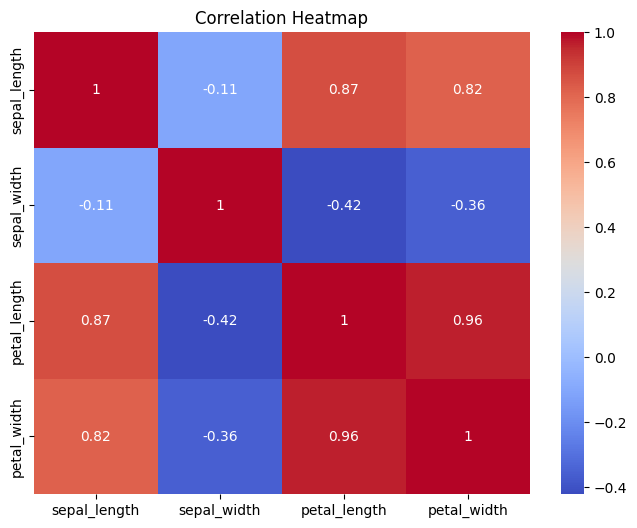

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Data clening and extraction

In [ ]:
duplicates = df.duplicated().sum()

# Remove duplicates if any
df.drop_duplicates(inplace=True)

We have to use lable encodeing to encode label the colum species bescuse it catagorical we have convert it to numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
from sklearn.preprocessing import StandardScaler
cols_to_scale = ['sepal_length','sepal_width','petal_length','petal_width']
scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Features and target
X = df.drop('species', axis=1)
y = df['species']

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.915509,1.019971,-1.357737,-1.3357,0
1,-1.157560,-0.128082,-1.357737,-1.3357,0
2,-1.399610,0.331139,-1.414778,-1.3357,0
3,-1.520635,0.101529,-1.300696,-1.3357,0
4,-1.036535,1.249582,-1.357737,-1.3357,0


We cannot drop any colum because every column is equaly usefull in the to train the model to get highing accuracy

Model training

KNN model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  # k=5 is default
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
knn.score(X_train,y_train)

0.9658119658119658

Example of model


In [ ]:
input = [[5.1, 3.5, 1.4, 0.2]]
# Scale the input (using the scaler you used before)
scaled_input = scaler.transform(input)

# Predict
prediction = knn.predict(scaled_input)

# Decode label because we use label encoding in species
predicted_species = le.inverse_transform(prediction)

print("Predicted species:", predicted_species[0])


Predicted species: Iris-setosa


Model evalution

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#Classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.9333333333333333
Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

